In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [3]:
# Generate the dataset
X, y = make_circles(n_samples=400, factor=.3, noise=.05)
X.shape

(400, 2)

In [7]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

In [10]:
# Apply Kernel PCA
kpca = KernelPCA(kernel="rbf", gamma=10)
X_kpca = kpca.fit_transform(X)
X_kpca.shape # promoted the data to higher dimention then calculated the eigen vectors

(400, 291)

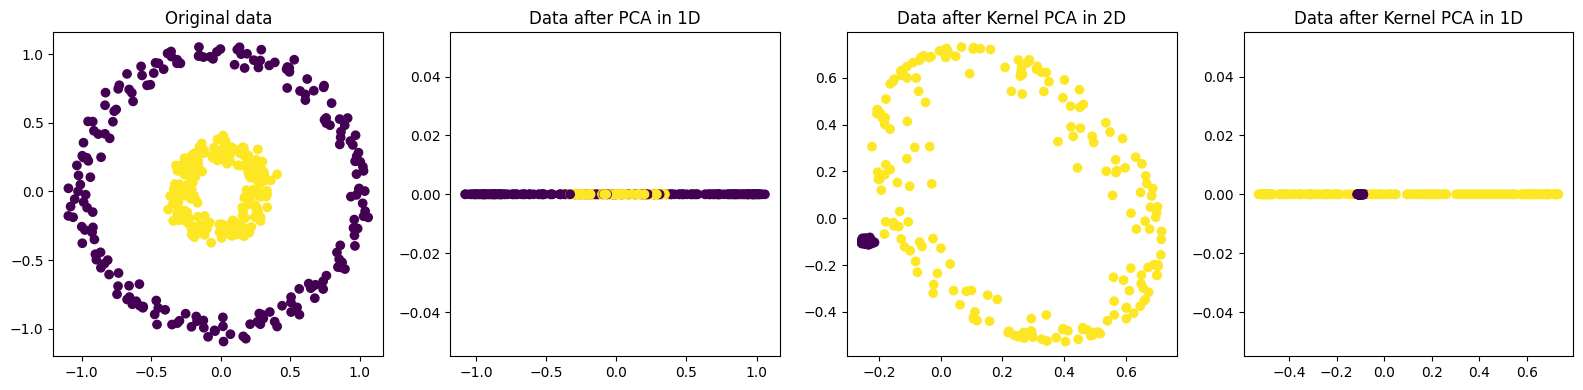

In [13]:
# Original data plot
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original data')

# Transformed data with PCA in 1D
plt.subplot(1, 4, 2)
plt.scatter(X_pca[:, 0], np.zeros((400,)), c=y)
plt.title('Data after PCA in 1D')

# Transformed data with Kernel PCA in 2D
plt.subplot(1, 4, 3)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.title('Data after Kernel PCA in 2D')

# Transformed data with Kernel PCA in 1D
plt.subplot(1, 4, 4)
plt.scatter(X_kpca[:, 1], np.zeros((400,)), c=y)
plt.title('Data after Kernel PCA in 1D')

plt.tight_layout()
plt.show()
# All the new fearures are principle components

*The behavour of KernelPCA is stochastic in nature*

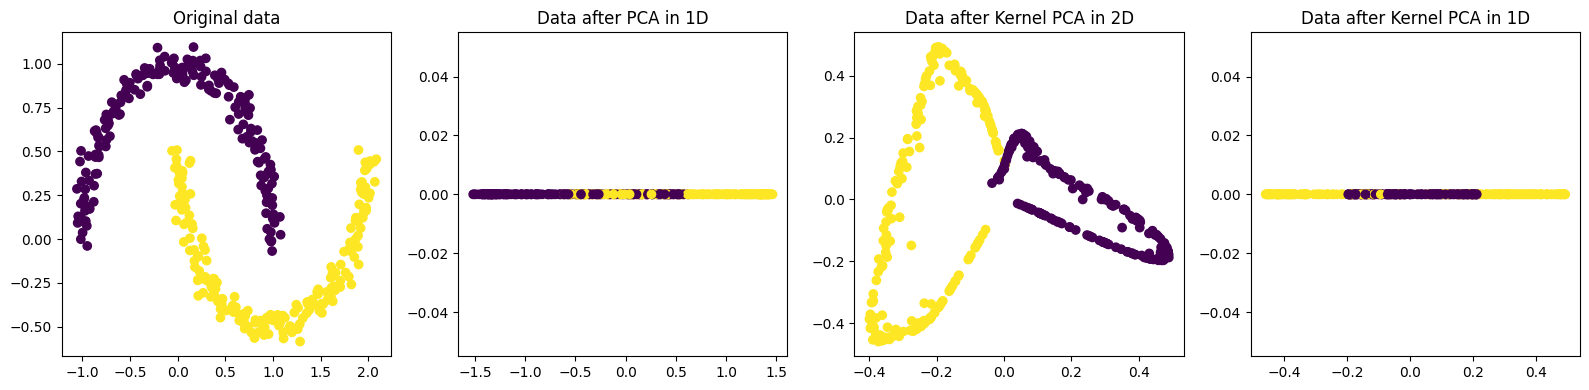

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_moons

# Generate the dataset
X, y = make_moons(n_samples=400, noise=.05)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Apply Kernel PCA
kpca = KernelPCA(kernel="rbf", gamma=15)
X_kpca = kpca.fit_transform(X)

# Original data plot
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original data')

# Transformed data with PCA in 1D
plt.subplot(1, 4, 2)
plt.scatter(X_pca[:, 0], np.zeros((400,)), c=y)
plt.title('Data after PCA in 1D')

# Transformed data with Kernel PCA in 2D
plt.subplot(1, 4, 3)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.title('Data after Kernel PCA in 2D')

# Transformed data with Kernel PCA in 1D
plt.subplot(1, 4, 4)
plt.scatter(X_kpca[:, 1], np.zeros((400,)), c=y)
plt.title('Data after Kernel PCA in 1D')

plt.tight_layout()
plt.show()

In [15]:
import plotly.graph_objs as go
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import numpy as np

# Create the half moon data
X, y = make_moons(n_samples=500, noise=0.02)

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply the RBF kernel PCA
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X_std)

# Create a trace for the original data
trace1 = go.Scatter(x=X_std[y==0, 0], y=X_std[y==0, 1],
                    mode='markers', name='Class 0',
                    marker=dict(color='red', size=5, opacity=0.5))
trace2 = go.Scatter(x=X_std[y==1, 0], y=X_std[y==1, 1],
                    mode='markers', name='Class 1',
                    marker=dict(color='blue', size=5, opacity=0.5))

# Create a trace for the transformed data
trace3 = go.Scatter3d(x=X_kpca[y==0, 0], y=X_kpca[y==0, 1], z=X_kpca[y==0, 2],
                      mode='markers', name='Class 0',
                      marker=dict(color='red', size=5, opacity=0.5))
trace4 = go.Scatter3d(x=X_kpca[y==1, 0], y=X_kpca[y==1, 1], z=X_kpca[y==1, 2],
                      mode='markers', name='Class 1',
                      marker=dict(color='blue', size=5, opacity=0.5))

# Create the layouts
layout1 = go.Layout(title='Original data in 2D', autosize=True,
                    xaxis=dict(title='Feature 1'),
                    yaxis=dict(title='Feature 2'))
layout2 = go.Layout(title='Data after RBF Kernel PCA in 3D', autosize=True,
                    scene=dict(xaxis=dict(title='PC 1'),
                               yaxis=dict(title='PC 2'),
                               zaxis=dict(title='PC 3')))

# Create the figures and plot
fig1 = go.Figure(data=[trace1, trace2], layout=layout1)
fig2 = go.Figure(data=[trace3, trace4], layout=layout2)

fig1.show()
fig2.show()


## Kernel PCA step by step

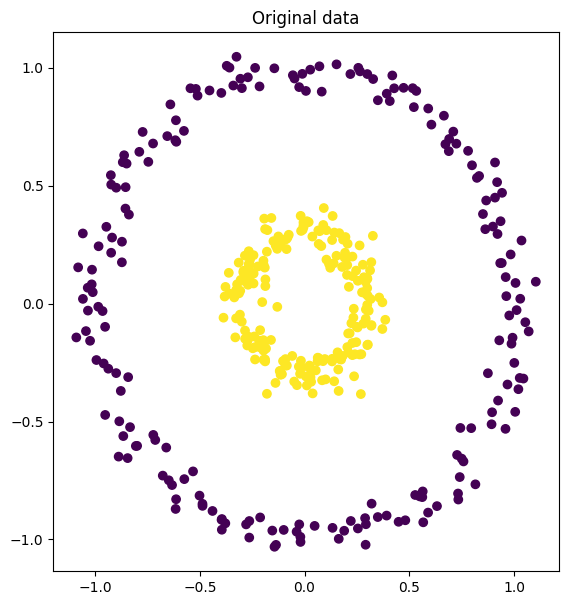

In [36]:
# Generate the dataset
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

# Original data plot
plt.figure(figsize=(30, 7))
plt.subplot(1, 4, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original data')
plt.show()

In [37]:
# Mean Centring
X_centered = X - np.mean(X, axis=0)

Text(0.5, 1.0, 'Original data')

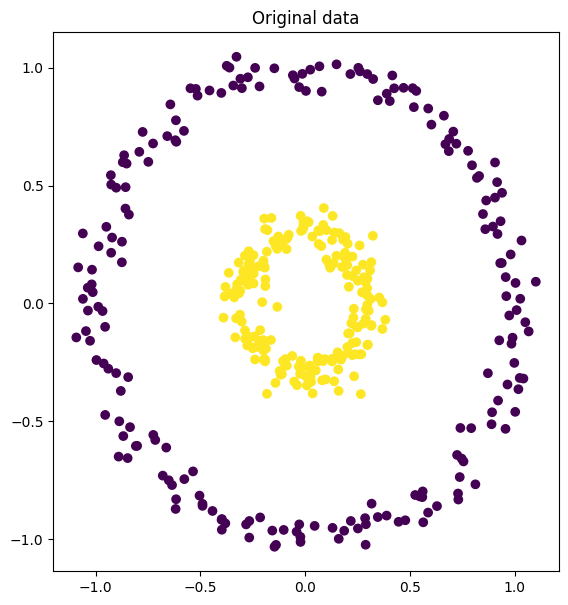

In [38]:
plt.figure(figsize=(30, 7))
plt.subplot(1, 4, 1)
plt.scatter(X_centered[:, 0], X_centered[:, 1], c=y)
plt.title('Original data')

In [47]:
X.shape[0]

400

In [39]:
def rbf_kernel(x1, x2, gamma=0.1):
    distance = np.linalg.norm(x1 - x2) ** 2
    return np.exp(-gamma * distance)

# Create the kernel matrix
n_samples = X.shape[0]
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf_kernel(X_centered[i], X_centered[j])

K.shape # Becomes a summetric matric

(400, 400)

In [40]:
from scipy.linalg import eigh
eigenvalues, eigenvectors = eigh(K)

In [41]:
eigenvectors.shape

(400, 400)

In [42]:
eigenvalues

array([-8.13548276e-14, -3.38619511e-15, -2.29425223e-15, -2.02806601e-15,
       -1.95383023e-15, -1.76106232e-15, -1.66332677e-15, -1.60713146e-15,
       -1.54135534e-15, -1.32457348e-15, -1.27305961e-15, -1.15433776e-15,
       -1.11731168e-15, -8.60569115e-16, -8.38556803e-16, -8.33304804e-16,
       -8.21820628e-16, -7.66396453e-16, -7.48599376e-16, -7.41014668e-16,
       -7.26338899e-16, -6.28507450e-16, -5.84119950e-16, -5.67943382e-16,
       -5.11841420e-16, -4.76796592e-16, -4.74353911e-16, -4.74026460e-16,
       -4.59110519e-16, -4.54734095e-16, -3.89416575e-16, -3.84012645e-16,
       -3.81092032e-16, -3.54892715e-16, -3.50387632e-16, -3.25614781e-16,
       -3.20295845e-16, -3.12338820e-16, -2.93716655e-16, -2.87191493e-16,
       -2.82961137e-16, -2.51259985e-16, -2.42176649e-16, -2.40530370e-16,
       -2.34263915e-16, -2.31430304e-16, -2.24661475e-16, -2.19408650e-16,
       -2.17777474e-16, -2.15337488e-16, -2.11955859e-16, -2.08758823e-16,
       -2.03842160e-16, -

In [43]:
# Reverse the arrays as eigh returns them in ascending order
eigenvalues = eigenvalues[::-1]
eigenvectors = eigenvectors[:, ::-1]

In [44]:
k = 2
X_kpca = eigenvectors[:, :k]

In [45]:
X_kpca.shape

(400, 2)

Text(0.5, 1.0, 'Data after Kernel PCA in 1D')

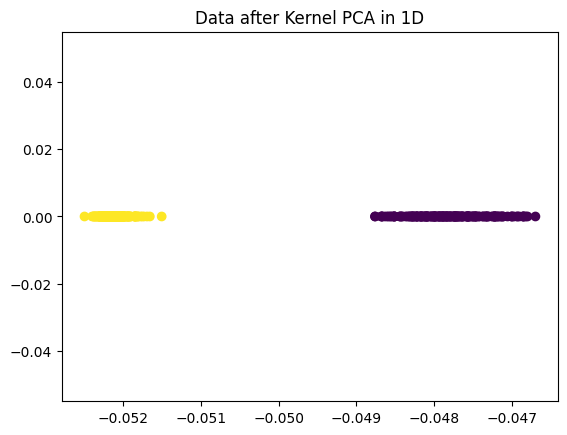

In [46]:
plt.scatter(X_kpca[:, 0], np.zeros((400,)), c=y)
plt.title('Data after Kernel PCA in 1D')

<i>The way to find the principle component which covers max variance in KernelPCA is to apply a Machine Learning algorithm along with it by taking each eigen vector and find the accuracy / performance matrix and whichever got the highest accuracy will be that PC.</i>